1.1. Аналитически вычислить первообразную функции f(x) = xsin(x).

1.2. Используя оператор цикла и условный оператор создать функцию интегрирования методами Ньютона-Котеса для методов средних прямоугольников, трапеций и Симпсона. Тип метода задаётся параметром 'tip'.

In [13]:
import math as m
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

a = 5
b = 10
N = 50

f = lambda x: x * m.sin(x)
F = lambda x: m.sin(x) - x * m.cos(x) # Первообразная функции f(x) = xsin(x).

def method_N_L(b, a):
    return F(b) - F(a)

def method_N_K(f, a, b, N, tip):
    summ = 0
    h = (b - a) / N
    if tip == 'mid_rect':
        for i in range(N):
            summ += h * f(a + i * h + h / 2)
    elif tip == 'left_rect':
        for i in range(N):
            summ += h * f(a + i * h)
    elif tip == 'trapeze':
        for i in range(N):
            summ += (h / 2) * (f(a + h * (i + 1)) \
                               + f(a + i * h))
    elif tip == 'simpson':
        for i in range(0, N, 2):
            summ += (h / 3) * (f(a + i * h) + \
                               4 * f(a + h * (i + 1)) \
                               + f(a + h * (i + 2)))
    return summ

Значение интеграла, вычисленное по формуле Ньютона-Лейбница:

In [14]:
method_N_L(b, a)

10.223929381854424

Значение интеграла, вычисленное по методу средних прямоугольников:

In [15]:
tip = 'mid_rect'

method_N_K(f, a, b, N, tip)

10.227844640843918

Значение интеграла, вычисленное по методу левых прямоугольников:

In [16]:
tip = 'left_rect'

method_N_K(f, a, b, N, tip)

10.248379243010472

Значение интеграла, вычисленное по методу трапеций:

In [17]:
tip = 'trapeze'

method_N_K(f, a, b, N, tip)

10.216099756231571

Значение интеграла, вычисленное по методу Симпсона:

In [18]:
tip = 'simpson'

method_N_K(f, a, b, N, tip)

10.223934144928377

1.3. Построить графики абсолютной и относительной погрешностей численного интегрирования функции f(x) = xsin(x):

(0.0001, 3)

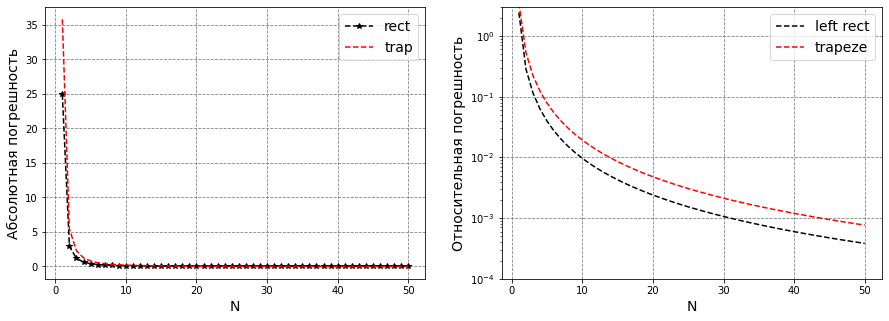

In [19]:
fig = plt.figure(figsize = (15, 5))

n = [i for i in range(1, N + 1)]
abs_err_summ_rect = [0 for i in range(len(n))]
abs_err_summ_trap = [0 for i in range(len(n))]

for i in range(len(n)):
    abs_err_summ_rect[i] = abs(method_N_L(b, a) - method_N_K(f, a, b, n[i], 'mid_rect'))
    abs_err_summ_trap[i] = abs(method_N_L(b, a) - method_N_K(f, a, b, n[i], 'trapeze'))
                                
ax1 = fig.add_subplot(121)
ax1.plot(n, abs_err_summ_rect, linestyle = '--',\
        marker = '*', color = 'black', label = 'rect')
ax1.plot(n, abs_err_summ_trap, linestyle = '--',\
        color = 'r', label = 'trap')

plt.xlabel('N', fontsize = 14)
plt.ylabel('Абсолютная погрешность', fontsize = 14)

ax1.legend(fontsize = 14)
ax1.grid(which = 'major', linestyle = '--', color = 'gray')

ax2 = fig.add_subplot(122)
ax2.plot(n, [i / abs(method_N_L(b, a)) for i in abs_err_summ_rect],\
         linestyle = '--', color = 'black', label = 'left rect')
ax2.plot(n, [i / abs(method_N_L(b, a)) for i in abs_err_summ_trap],\
         linestyle = '--', color = 'r', label = 'trapeze')

plt.xlabel('N', fontsize = 14)
plt.ylabel('Относительная погрешность', fontsize = 14)

ax2.legend(fontsize = 14)
ax2.grid(which = 'major', linestyle = '--', color = 'gray')
ax2.set_yscale('log')
ax2.set_ylim(10**(-4), 3)

1.4. Оценить результаты, выбрать наиболее точный метод:

1.5. Сравнить погрешности расчёта с помощью функции method_N_K() и с помощью функций trapz(), simps(), quad() млжудя integrate библиотеки scipy при количестве интервалов N = 50.

In [48]:
print('Точный интеграл = ', (method_N_L(b, a)))

print('Метод средних прямоугольников = ', \
      method_N_K(f, a, b, N, 'mid_rect'), \
     ', абсолютная погрешность = ', \
      abs(method_N_L(b, a) - method_N_K(f, a, b, N, 'mid_rect')))

print('Метод трапеций = ', \
      method_N_K(f, a, b, N, 'trapeze'), \
     ', абсолютная погрешность = ', \
      abs(method_N_L(b, a) - method_N_K(f, a, b, N, 'trapeze')))

print('Метод Симпсона = ', \
      method_N_K(f, a, b, N, 'simpson'), \
     ', абсолютная погрешность = ', \
      abs(method_N_L(b, a) - method_N_K(f, a, b, N, 'simpson')))

h = (b - a) / N
x = np.arange(a, b, h)
y = np.array([f(x) for x in x])

print('Точный интеграл Scipy: интеграл = ', \
      integrate.quad(f, a, b)[0], ', абсолютная погрешность = ', \
      abs(method_N_L(b, a) - integrate.quad(f, a, b)[0] + integrate.quad(f, a, b)[1])) 

print('Метод трапеций Scipy: интеграл = ', \
      integrate.trapz(y, x), ', абсолютная погрешность = ', \
      abs(method_N_L(b, a) - integrate.trapz(y, x))) 

print('Метод Симпсона Scipy: интеграл = ', \
      integrate.simps(y, x), ', абсолютная погрешность = ', \
      abs(method_N_L(b, a) - integrate.simps(y, x)))

Точный интеграл =  10.223929381854424
Метод средних прямоугольников =  10.227844640843918 , абсолютная погрешность =  0.003915258989493964
Метод трапеций =  10.216099756231571 , абсолютная погрешность =  0.007829625622852276
Метод Симпсона =  10.223934144928377 , абсолютная погрешность =  4.763073953029107e-06
Точный интеграл Scipy: интеграл =  10.223929381854424 , абсолютная погрешность =  2.354644901193503e-13
Метод трапеций Scipy: интеграл =  10.714590579095121 , абсолютная погрешность =  0.4906611972406978
Метод Симпсона Scipy: интеграл =  10.723016215554715 , абсолютная погрешность =  0.49908683370029117


integrate.quad(f, a, b) возвращает кортеж, содержащий значение интеграла и его абсолютную погрешность

In [38]:
print(integrate.quad(f, a, b)) 
print('Точный интеграл Scipy: интеграл = ', \
      integrate.quad(f, a, b)[0], ', абсолютная погрешность = ', \
      integrate.quad(f, a, b)[1]) 

(10.223929381854424, 2.354644901193503e-13)
Точный интеграл Scipy: интеграл =  10.223929381854424 , абсолютная погрешность =  2.354644901193503e-13


2. Аналитически задана функция f(x) = xsin(x). Используя операторы цикла написать программу, строящую график интеграла функции F(). 

Интеграл для каждого значения массива аргументов x, по которому строится график, вычисляется численно методом левых прямоугольников. Сравнить график численного интеграла с графиком интеграла функии, вычисленного аналитически.

Конечное значение при решении численным методом:  10.248379243010563
Конечное значение при решении аналитическим методом:  10.22392938185452


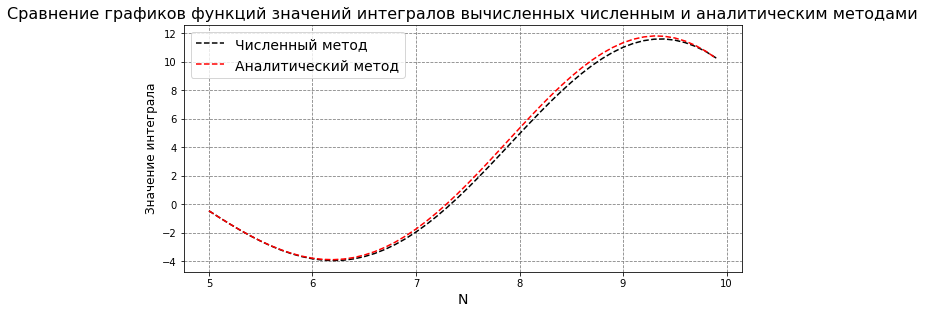

In [21]:
fig = plt.figure(figsize = (10, 10))

h = (b - a) / N
x = np.arange(a, b, h)
fx1 = np.array([method_N_K(f, a, x + h, i + 1, 'left_rect') for x in x])
fx2 = np.array([method_N_L(x + h, a) for x in x])

ax3 = fig.add_subplot(211)
ax3.plot(x, fx1, linestyle = '--',\
        color = 'black', label = 'Численный метод')
ax3.plot(x, fx2, linestyle = '--',\
        color = 'r', label = 'Аналитический метод')
ax3.legend(fontsize = 14)
ax3.grid(which = 'major', linestyle = '--', color = 'gray')
plt.title('Сравнение графиков функций значений интегралов вычисленных численным и аналитическим методами', fontsize = 16)
plt.xlabel('N', fontsize = 14)
plt.ylabel('Значение интеграла', fontsize = 12)

print('Конечное значение при решении численным методом: ', fx1[len(x)-1])
print('Конечное значение при решении аналитическим методом: ', fx2[len(x)-1])